Paso             | Qué hace

Carga y limpieza | Prepara el DataFrame y la columna de fecha

Codificación     | Convierte texto en números

Normalización    | Escala las variables entre 0 y 1

Secuencias       | Genera las ventanas de tiempo que la RNN usará como entrada

Split            | Divide en datos de entrenamiento y prueba

Modelo GRU       | Crea una red recurrente con memoria de corto plazo

Entrenamiento    | Ajusta pesos con backpropagation

One-Step Prediction | Evalúa qué tan bien predice el siguiente valor

Multiple-Step Prediction | Proyecta al futuro usando solo las predicciones previas

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import matplotlib.pyplot as plt

Epoch 1/20


/Users/samuelsanchezrobles/Desarrollo/Redes-El-ctricas-Espa-a/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1052 - val_loss: 0.0237
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0224 - val_loss: 0.0191
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0198 - val_loss: 0.0176
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0178 - val_loss: 0.0159
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0165 - val_loss: 0.0144
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0160 - val_loss: 0.0123
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0124 - val_loss: 0.0100
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0094 - val_loss: 0.0055
Epoch 9/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0053 - val_loss: 0.0052
Epoch 10/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0051 - val_loss: 0.0053
Epoch 11/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0043 - val_loss: 0.0048
Epoch 12/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0047 - val_loss: 0.0048


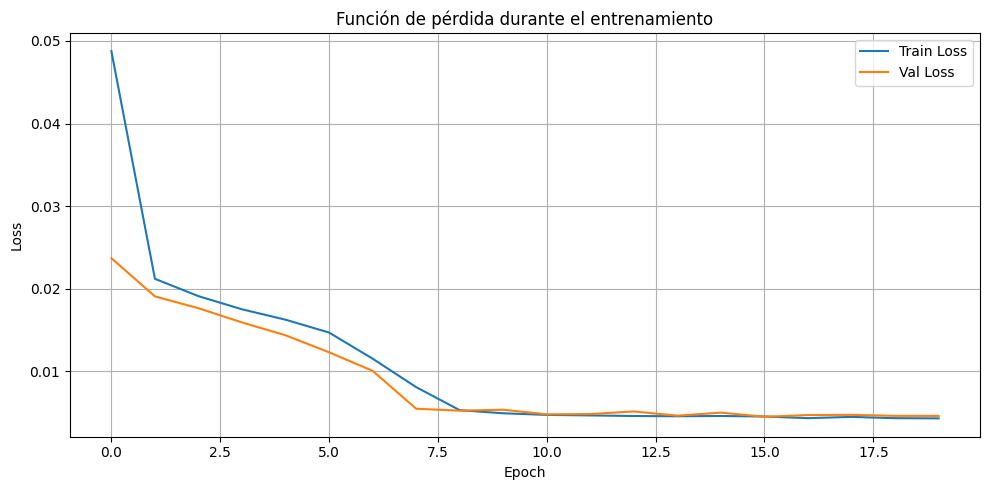

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


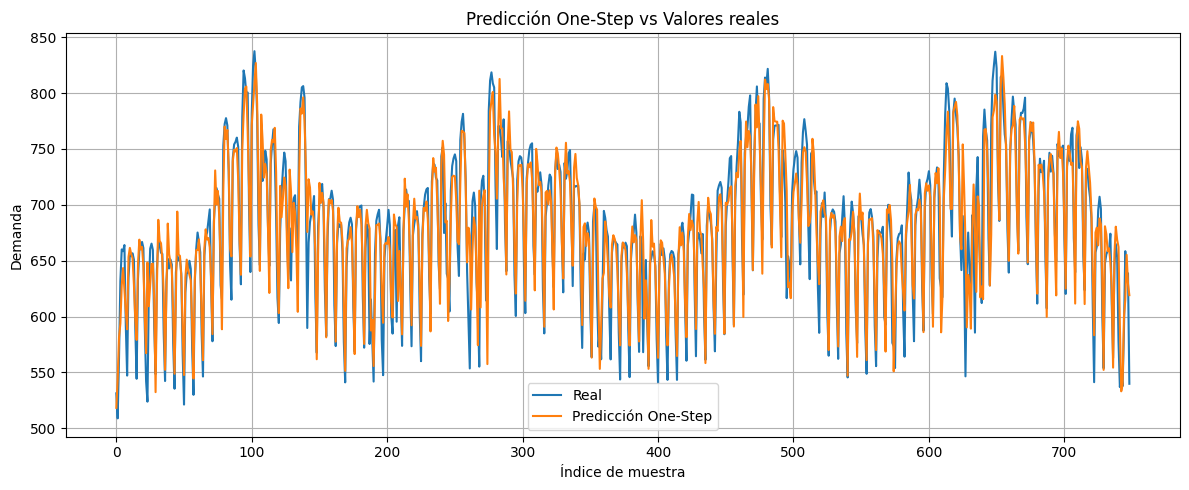

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
        fecha  demanda_predicha
0  2025-04-25        619.190796
1  2025-04-26        580

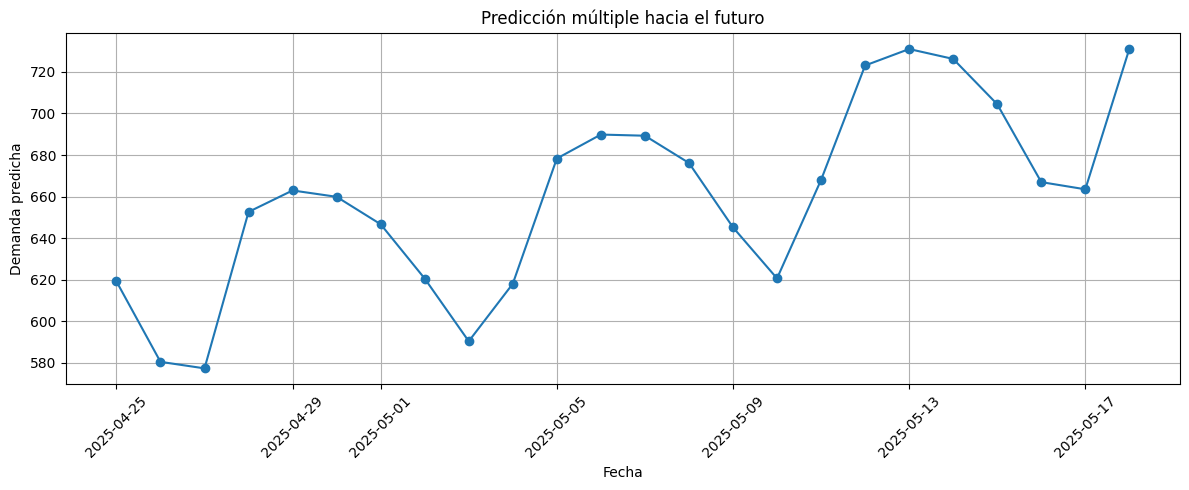

In [3]:
df = pd.read_csv('../data/demanda-depurado.csv')

df['fecha'] = pd.to_datetime(df['fecha'])
df = df.sort_values('fecha')


le_region = LabelEncoder()
le_indicador = LabelEncoder()

df['region_encoded'] = le_region.fit_transform(df['region'])
df['indicador_encoded'] = le_indicador.fit_transform(df['indicador'])


features = ['valor', 'region_encoded', 'indicador_encoded']


scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[features])


def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size, 0])  
    return np.array(X), np.array(y)

window_size = 24
X, y = create_sequences(df_scaled, window_size)


X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)


model = Sequential([
    GRU(64, input_shape=(window_size, X_train.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')


history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=20,
                    batch_size=32)


plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Función de pérdida durante el entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


def one_step_prediction(model, X, scaler):
    preds = model.predict(X)
    valor_scaler = MinMaxScaler()
    valor_scaler.min_, valor_scaler.scale_ = scaler.min_[0], scaler.scale_[0]
    return valor_scaler.inverse_transform(preds)

one_step_preds = one_step_prediction(model, X_test, scaler)

plt.figure(figsize=(12, 5))
valor_scaler = MinMaxScaler()
valor_scaler.min_, valor_scaler.scale_ = scaler.min_[0], scaler.scale_[0]
y_test_invert = valor_scaler.inverse_transform(y_test.reshape(-1, 1))

plt.plot(y_test_invert, label='Real')
plt.plot(one_step_preds, label='Predicción One-Step')
plt.title('Predicción One-Step vs Valores reales')
plt.xlabel('Índice de muestra')
plt.ylabel('Demanda')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


def multiple_step_prediction(model, input_seq, steps, scaler):
    preds = []
    current_seq = input_seq.copy()
    
    for _ in range(steps):
        pred = model.predict(current_seq[np.newaxis])[0][0]
        preds.append(pred)
        
        # Actualizar secuencia deslizante
        next_input = np.roll(current_seq, -1, axis=0)
        next_input[-1] = np.copy(current_seq[-1])
        next_input[-1][0] = pred  

        current_seq = next_input

    valor_scaler = MinMaxScaler()
    valor_scaler.min_, valor_scaler.scale_ = scaler.min_[0], scaler.scale_[0]
    return valor_scaler.inverse_transform(np.array(preds).reshape(-1, 1))


future_steps = 24
last_seq = X_test[-1]  

predicciones_futuras = multiple_step_prediction(model, last_seq, steps=future_steps, scaler=scaler)


last_date = df['fecha'].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_steps)


df_futuro = pd.DataFrame({
    'fecha': future_dates,
    'demanda_predicha': predicciones_futuras.flatten()
})

print(df_futuro)


plt.figure(figsize=(12, 5))
plt.plot(df_futuro['fecha'], df_futuro['demanda_predicha'], marker='o', linestyle='-')
plt.title('Predicción múltiple hacia el futuro')
plt.xlabel('Fecha')
plt.ylabel('Demanda predicha')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [4]:
import joblib


joblib.dump(model, "../../models/modelo_GRU.keras")

['../../models/modelo_GRU.keras']

In [ ]:
##############################################################################################################